# Potential Energy Surface Plotter

In [1]:
# from IPython.display import Image

In [2]:
# file = ('../images/Grabow_plots/Grabow_PES.png')
# Image(filename=file, width = 900) 

we are missing CO2 mechanism, so let's compare thermo and barriers for CO2, CO2X, HCOOX, HCOOHX, CH3O2X, and CH2OX

# plotting potential energy surface

the following takes a cantera cti/yaml file and loads it as a gas solution object and a surface Interface object. the species enthalpies and activation energies are plotted using the pes_plot object

In [73]:
import cantera as ct
from IPython.display import Image
from sbr import sbr
%matplotlib inline

import os
import sys
sys.path.append(f'{os.getcwd()}/tools')
import pes_plot


# get current RMG model:
# get current RMG model:
rmg_model_folder = "../../../meOH-synthesis/"
cti_file_path = rmg_model_folder + "base/cantera/chem_annotated.cti"

In [74]:
pes_plot_1 = pes_plot.pes_plot(cti_file_path)

['CO2*(15)', 'H*(10)']
flipped equation:  CO*(14) + OH*(12) <=> CO2*(15) + H*(10) CO2*(15) + H*(10) <=> CO*(14) + OH*(12)


[[(3, '--', 1, 'k')],
 [(4, '--', 1, 'k')],
 [(5, '--', 1, 'k')],
 [(6, '--', 1, 'k')],
 [(7, '--', 1, 'k')],
 [(8, '--', 1, 'k')],
 [],
 [],
 []]

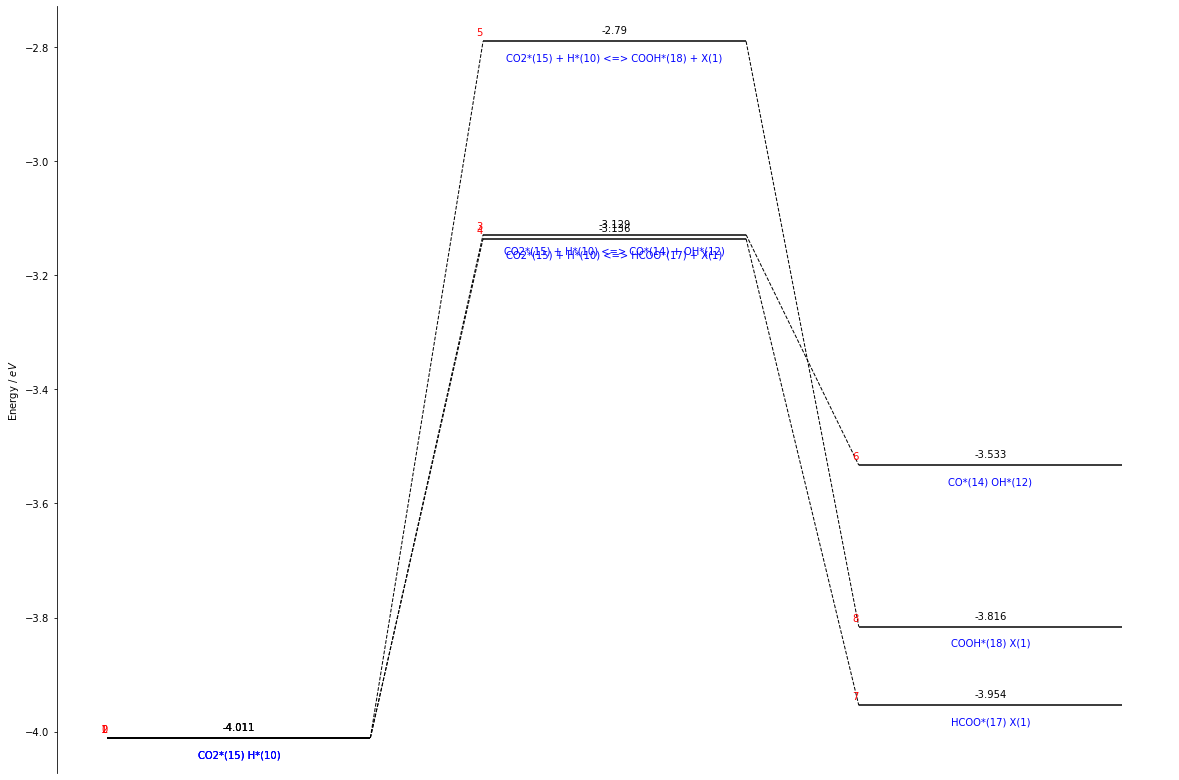

In [5]:
pes_plot_1.plot_pes_diagram(
    ["CO2*(15)","H*(10)"],
    width=20, 
    height=40, 
    offset = 0.01,
#     dimension = 10,
#     space = 10, 
    combined=True
)
pes_plot_1.diagram.links

In [6]:
pes_plot_1.pes_rxn_dict

{'CO2*(15) + H*(10) <=> CO*(14) + OH*(12)': <pes_plot.pes_reaction_combine at 0x2b508244afd0>,
 'CO2*(15) + H*(10) <=> HCOO*(17) + X(1)': <pes_plot.pes_reaction_combine at 0x2b508244af50>,
 'CO2*(15) + H*(10) <=> COOH*(18) + X(1)': <pes_plot.pes_reaction_combine at 0x2b507b4b2410>}

{'CO2*(15) + H*(10) <=> CO*(14) + OH*(12)': <pes_plot.pes_reaction_combine at 0x2b508244afd0>,
 'CO2*(15) + H*(10) <=> HCOO*(17) + X(1)': <pes_plot.pes_reaction_combine at 0x2b508244af50>,
 'CO2*(15) + H*(10) <=> COOH*(18) + X(1)': <pes_plot.pes_reaction_combine at 0x2b507b4b2410>}

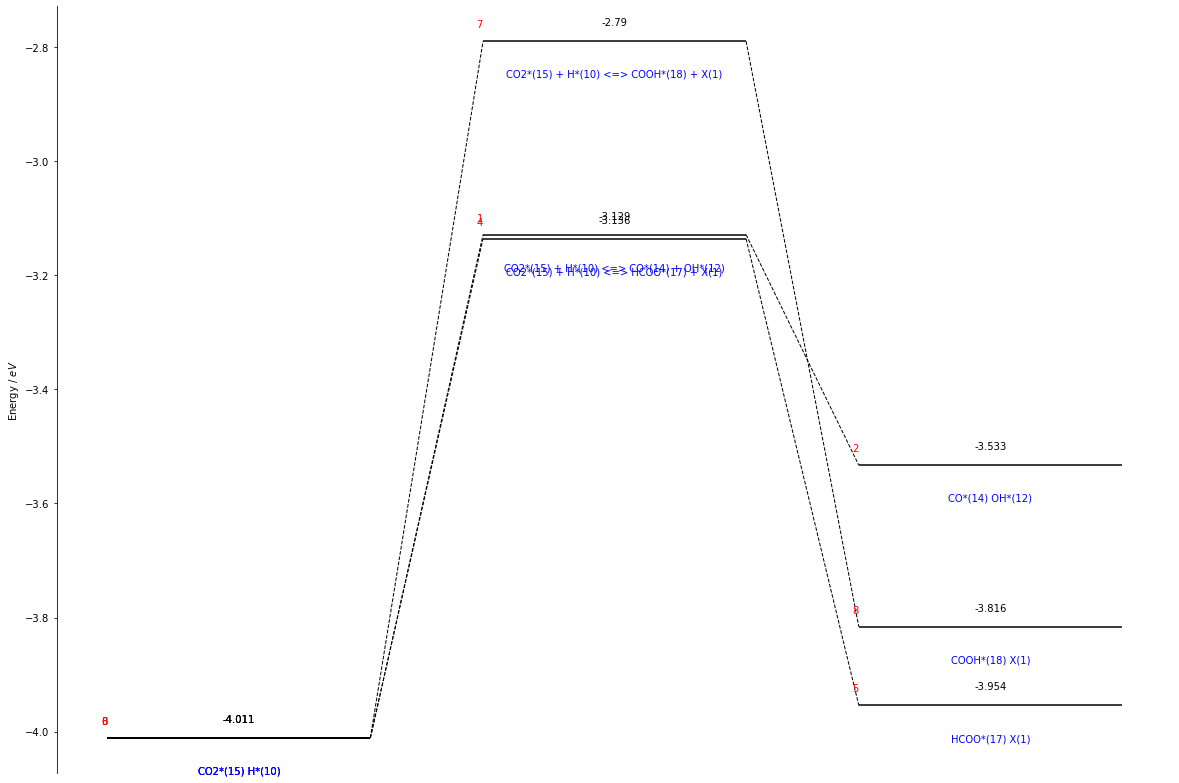

In [7]:
pes_plot_1.trim(" CO2*(15) + H*(10) <=> CO*(14) + OH*(12) ")
pes_plot_1.pes_rxn_dict

In [8]:
pes_plot_1.pes_rxn_dict

{'CO2*(15) + H*(10) <=> CO*(14) + OH*(12)': <pes_plot.pes_reaction_combine at 0x2b508244afd0>,
 'CO2*(15) + H*(10) <=> HCOO*(17) + X(1)': <pes_plot.pes_reaction_combine at 0x2b508244af50>,
 'CO2*(15) + H*(10) <=> COOH*(18) + X(1)': <pes_plot.pes_reaction_combine at 0x2b507b4b2410>}

['HCOO*(17)', 'X(1)']
flipped equation:  CO2*(15) + H*(10) <=> HCOO*(17) + X(1) HCOO*(17) + X(1) <=> CO2*(15) + H*(10)


[[],
 [(2, '--', 1, 'k')],
 [],
 [],
 [(5, '--', 1, 'k')],
 [],
 [(1, '--', 1, 'k'), (4, '--', 1, 'k'), (7, '--', 1, 'k')],
 [(8, '--', 1, 'k')],
 [],
 [(11, '--', 1, 'k')],
 [(12, '--', 1, 'k')],
 [(13, '--', 1, 'k')],
 [(14, '--', 1, 'k')],
 [],
 []]

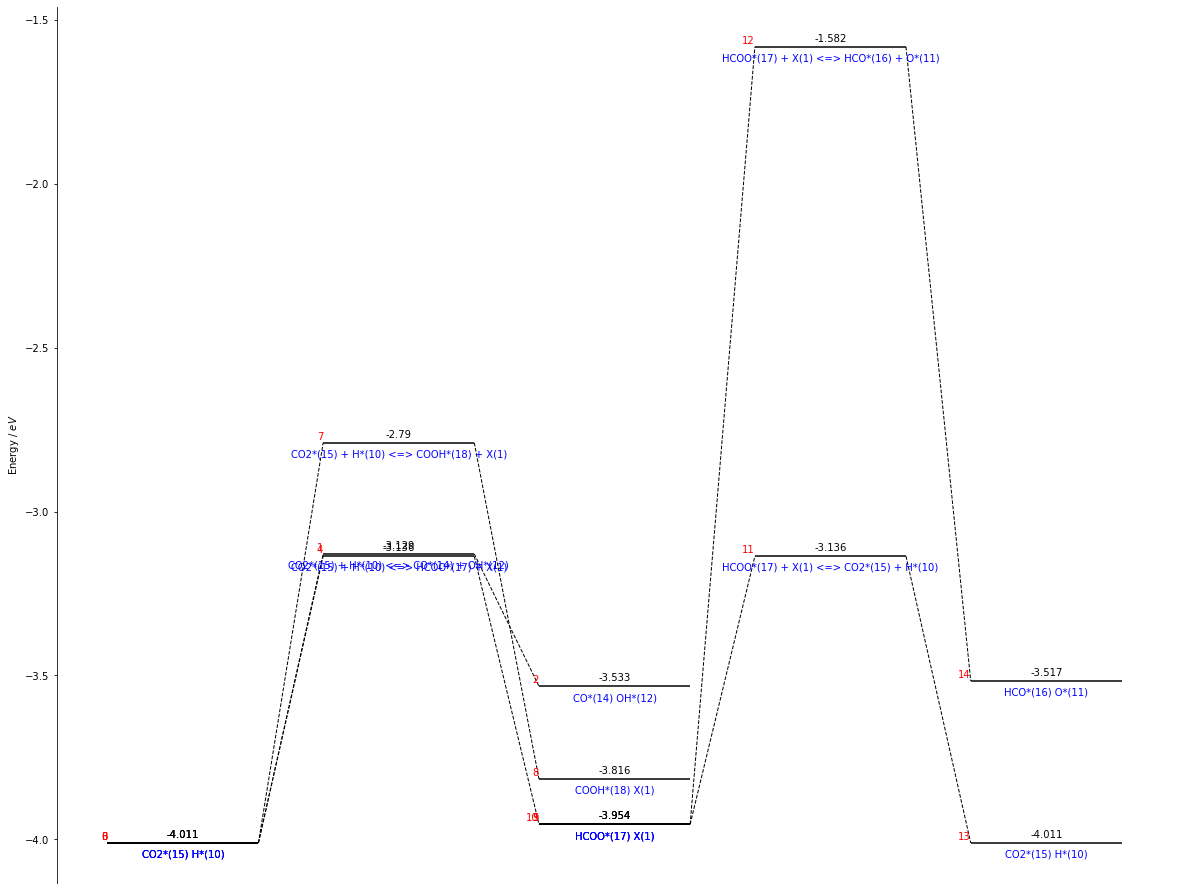

In [9]:
pes_plot_1.add_next_reaction(
    ["HCOO*(17)","X(1)"],
    width=20, 
    height=40, 
    offset = 0.01,
#     dimension = 10,
#     space = 10, 
)
pes_plot_1.diagram.links

In [9]:
pes_plot_1.diagram.data

[(-4.011, 0, 'CO2*(15) H*(10)', -4.011, 'k', '', ''),
 (-3.129, 1, 'CO2*(15) + H*(10) <=> CO*(14) + OH*(12)', -3.129, 'k', '', ''),
 (-3.533, 2, 'CO*(14) OH*(12)', -3.533, 'k', '', ''),
 (-4.011, 0, 'CO2*(15) H*(10)', -4.011, 'k', '', ''),
 (-3.136, 1, 'CO2*(15) + H*(10) <=> HCOO*(17) + X(1)', -3.136, 'k', '', ''),
 (-3.954, 2, 'HCOO*(17) X(1)', -3.954, 'k', '', ''),
 (-4.011, 0, 'CO2*(15) H*(10)', -4.011, 'k', '', ''),
 (-2.79, 1, 'CO2*(15) + H*(10) <=> COOH*(18) + X(1)', -2.79, 'k', '', ''),
 (-3.816, 2, 'COOH*(18) X(1)', -3.816, 'k', '', ''),
 (-3.954, 2, 'HCOO*(17) X(1)', -3.954, 'k', '', ''),
 (-3.954, 2, 'HCOO*(17) X(1)', -3.954, 'k', '', ''),
 (-3.136, 3, 'HCOO*(17) + X(1) <=> CO2*(15) + H*(10)', -3.136, 'k', '', ''),
 (-1.582, 3, 'HCOO*(17) + X(1) <=> HCO*(16) + O*(11)', -1.582, 'k', '', ''),
 (-4.011, 4, 'CO2*(15) H*(10)', -4.011, 'k', '', ''),
 (-3.517, 4, 'HCO*(16) O*(11)', -3.517, 'k', '', '')]

['HCO*(16)', 'O*(11)']
flipped equation:  HCOO*(17) + X(1) <=> HCO*(16) + O*(11) HCO*(16) + O*(11) <=> HCOO*(17) + X(1)


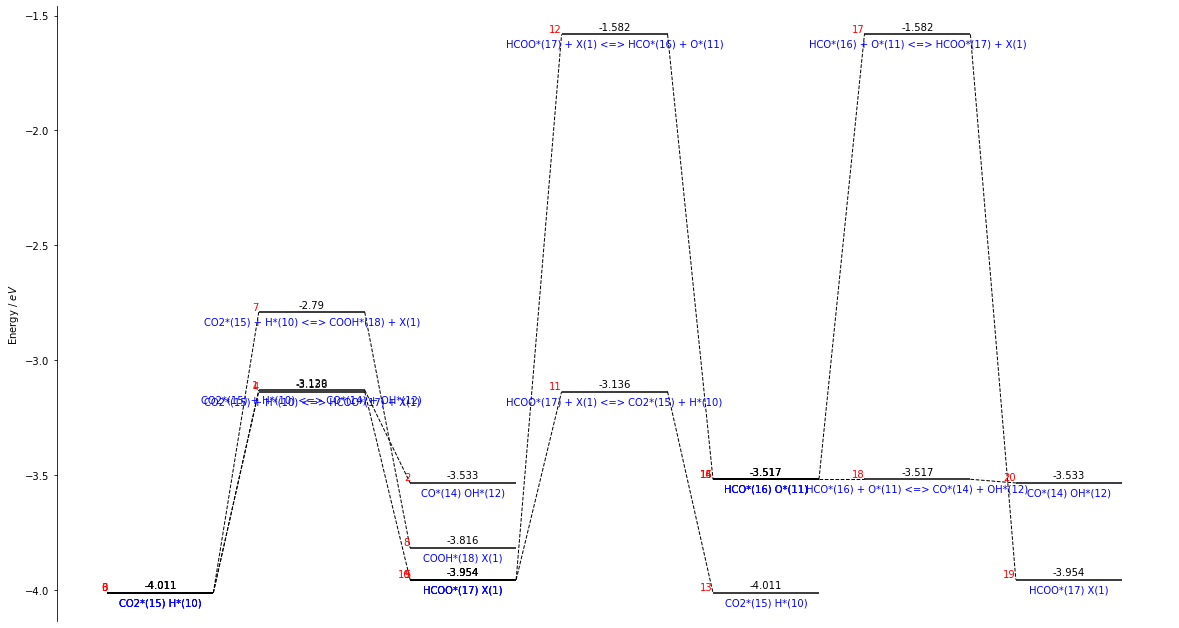

In [11]:
pes_plot_1.add_next_reaction(
    ["HCO*(16)","O*(11)"],
    width=20, 
    height=40, 
    offset = 0.01,
#     dimension = 10,
#     space = 10, 
)

['CO*(14)', 'OH*(12)']
flipped equation:  HCO*(16) + O*(11) <=> CO*(14) + OH*(12) CO*(14) + OH*(12) <=> HCO*(16) + O*(11)


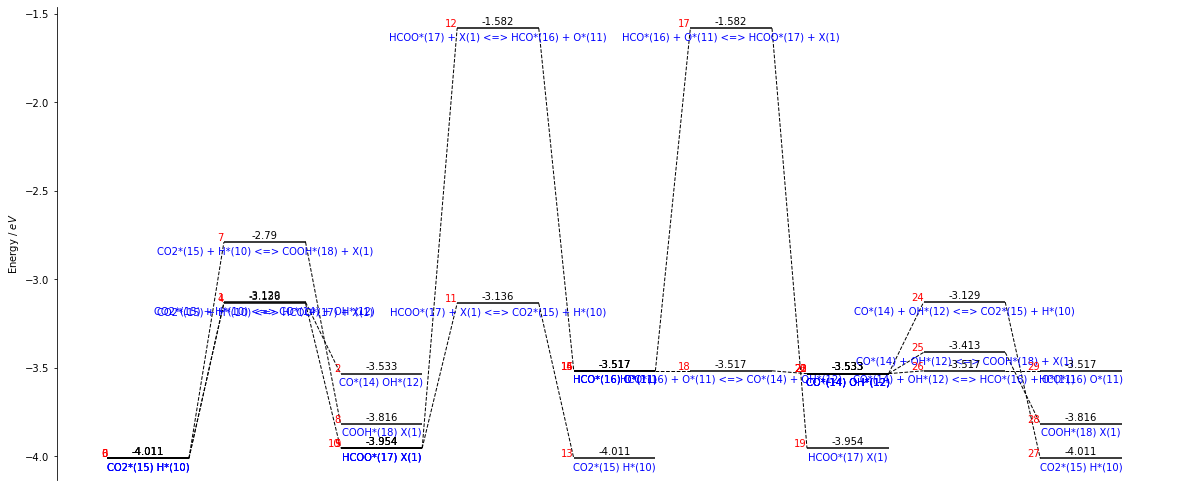

In [11]:
pes_plot_1.add_next_reaction(
    ["CO*(14)","OH*(12)"],
    width=20, 
    height=40, 
    offset = 0.01,
#     dimension = 10,
#     space = 10, 
)

In [12]:
pes_plot_1.diagram.data

[(-4.011, 0, 'CO2*(15) H*(10)', -4.011, 'k', '', ''),
 (-3.129, 1, 'CO2*(15) + H*(10) <=> CO*(14) + OH*(12)', -3.129, 'k', '', ''),
 (-3.533, 2, 'CO*(14) OH*(12)', -3.533, 'k', '', ''),
 (-4.011, 0, 'CO2*(15) H*(10)', -4.011, 'k', '', ''),
 (-3.136, 1, 'CO2*(15) + H*(10) <=> HCOO*(17) + X(1)', -3.136, 'k', '', ''),
 (-3.954, 2, 'HCOO*(17) X(1)', -3.954, 'k', '', ''),
 (-4.011, 0, 'CO2*(15) H*(10)', -4.011, 'k', '', ''),
 (-2.79, 1, 'CO2*(15) + H*(10) <=> COOH*(18) + X(1)', -2.79, 'k', '', ''),
 (-3.816, 2, 'COOH*(18) X(1)', -3.816, 'k', '', ''),
 (-3.954, 2, 'HCOO*(17) X(1)', -3.954, 'k', '', ''),
 (-3.954, 2, 'HCOO*(17) X(1)', -3.954, 'k', '', ''),
 (-3.136, 3, 'HCOO*(17) + X(1) <=> CO2*(15) + H*(10)', -3.136, 'k', '', ''),
 (-1.582, 3, 'HCOO*(17) + X(1) <=> HCO*(16) + O*(11)', -1.582, 'k', '', ''),
 (-4.011, 4, 'CO2*(15) H*(10)', -4.011, 'k', '', ''),
 (-3.517, 4, 'HCO*(16) O*(11)', -3.517, 'k', '', ''),
 (-3.517, 4, 'HCO*(16) O*(11)', -3.517, 'k', '', ''),
 (-3.517, 4, 'HCO*(16) O*(

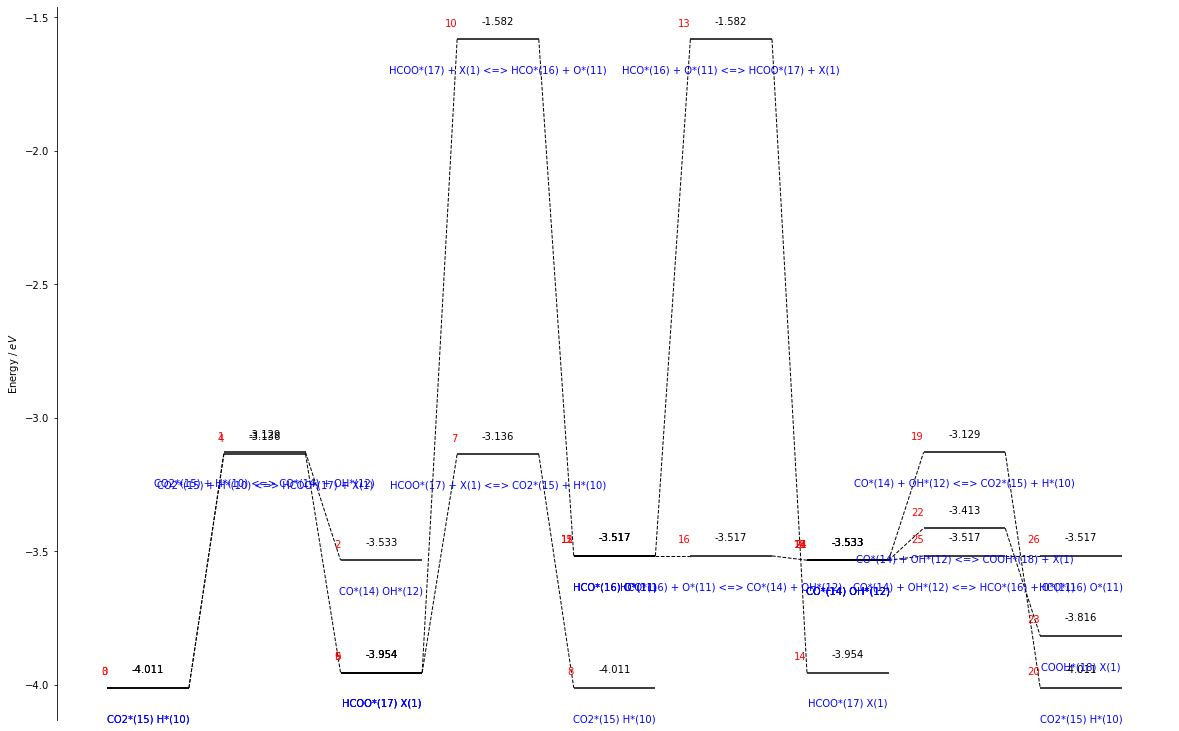

In [13]:
pes_plot_1.trim("CO2*(15) + H*(10) <=> COOH*(18) + X(1)")

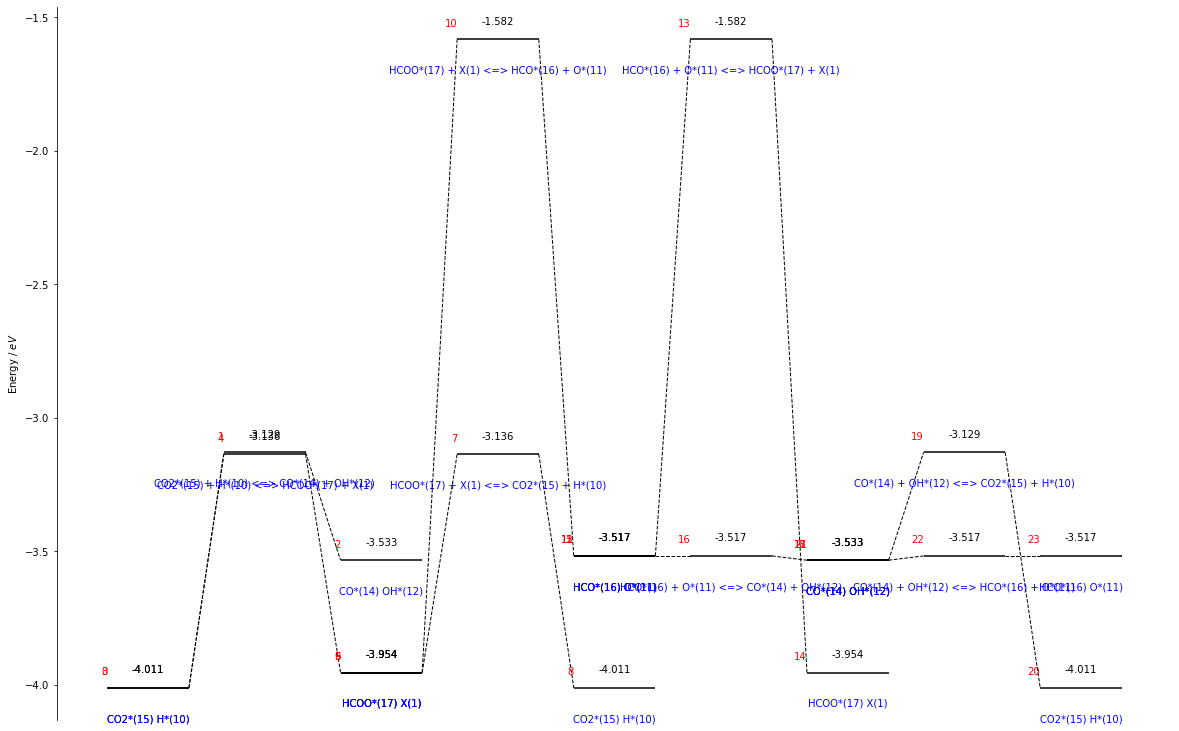

In [ ]:
pes_plot_1.trim("CO*(14) + OH*(12) <=> COOH*(18) + X(1)")

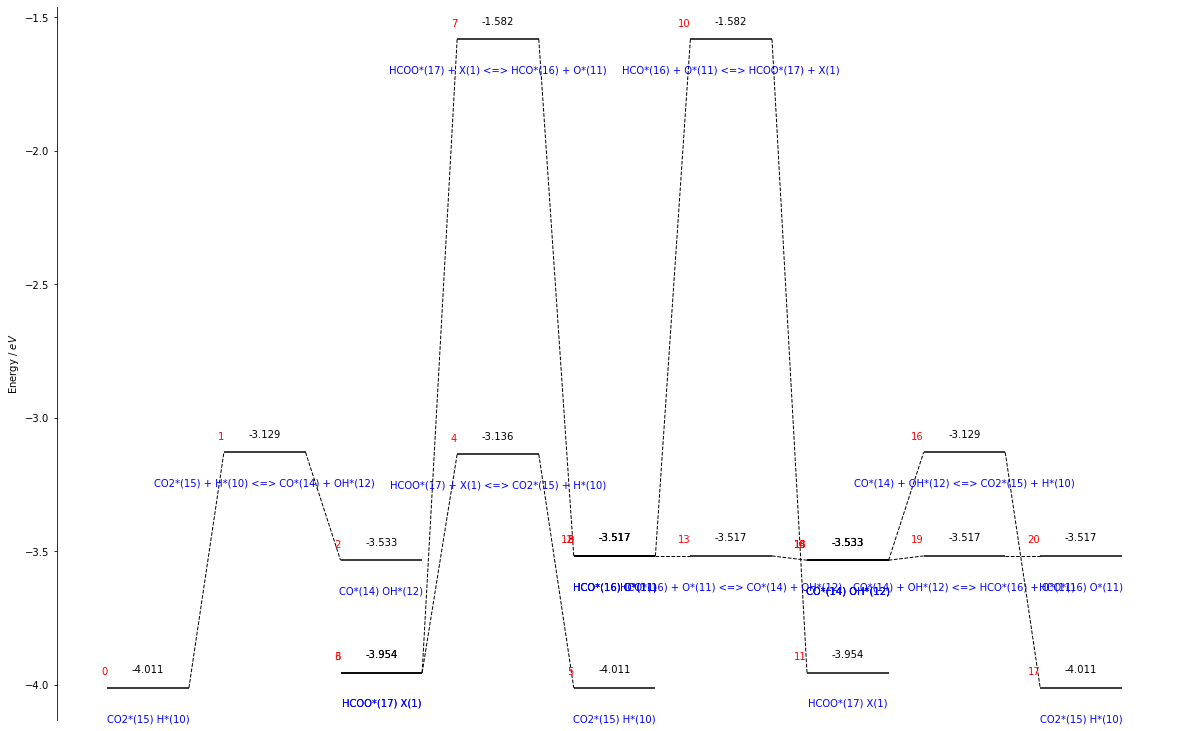

In [ ]:
pes_plot_1.trim("CO2*(15) + H*(10) <=> HCOO*(17) + X(1)")

['CO2*(15)', 'H*(10)']
flipped equation:  CO*(14) + OH*(12) <=> CO2*(15) + H*(10) CO2*(15) + H*(10) <=> CO*(14) + OH*(12)


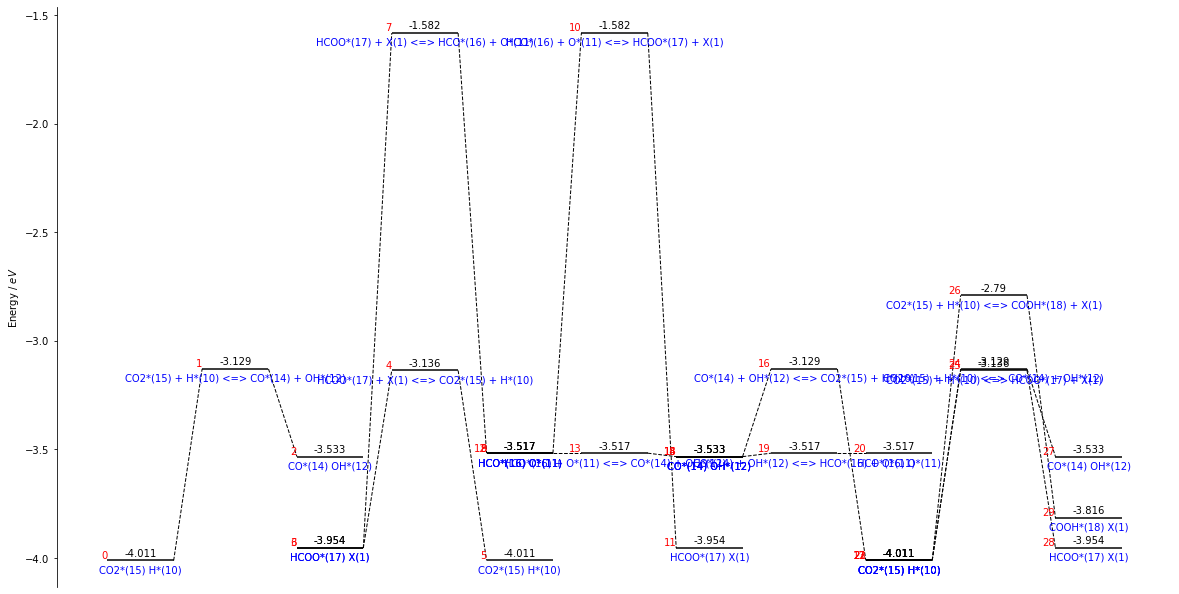

In [ ]:
pes_plot_1.add_next_reaction(
    ["CO2*(15)","H*(10)"],
    width=20, 
    height=40, 
    offset = 0.01,
#     dimension = 10,
#     space = 10, 
)

['COOH*(18)']
flipped equation:  HCO*(16) + OH*(12) <=> COOH*(18) + H*(10) COOH*(18) + H*(10) <=> HCO*(16) + OH*(12)
flipped equation:  HCOO*(17) <=> COOH*(18) COOH*(18) <=> HCOO*(17)
flipped equation:  CO2(4) + H*(10) <=> COOH*(18) COOH*(18) <=> CO2(4) + H*(10)
flipped equation:  HCOOH(7) + 2 X(1) <=> COOH*(18) + H*(10) COOH*(18) + H*(10) <=> HCOOH(7) + 2 X(1)
flipped equation:  CO2*(15) + H*(10) <=> COOH*(18) + X(1) COOH*(18) + X(1) <=> CO2*(15) + H*(10)
flipped equation:  CO*(14) + OH*(12) <=> COOH*(18) + X(1) COOH*(18) + X(1) <=> CO*(14) + OH*(12)
flipped equation:  CO*(14) + H2O*(13) <=> COOH*(18) + H*(10) COOH*(18) + H*(10) <=> CO*(14) + H2O*(13)
flipped equation:  CO2*(15) + OH*(12) <=> COOH*(18) + O*(11) COOH*(18) + O*(11) <=> CO2*(15) + OH*(12)
flipped equation:  HCOOH*(19) + O*(11) <=> COOH*(18) + OH*(12) COOH*(18) + OH*(12) <=> HCOOH*(19) + O*(11)
flipped equation:  HCOOH*(19) + OH*(12) <=> COOH*(18) + H2O*(13) COOH*(18) + H2O*(13) <=> HCOOH*(19) + OH*(12)
flipped equation: 

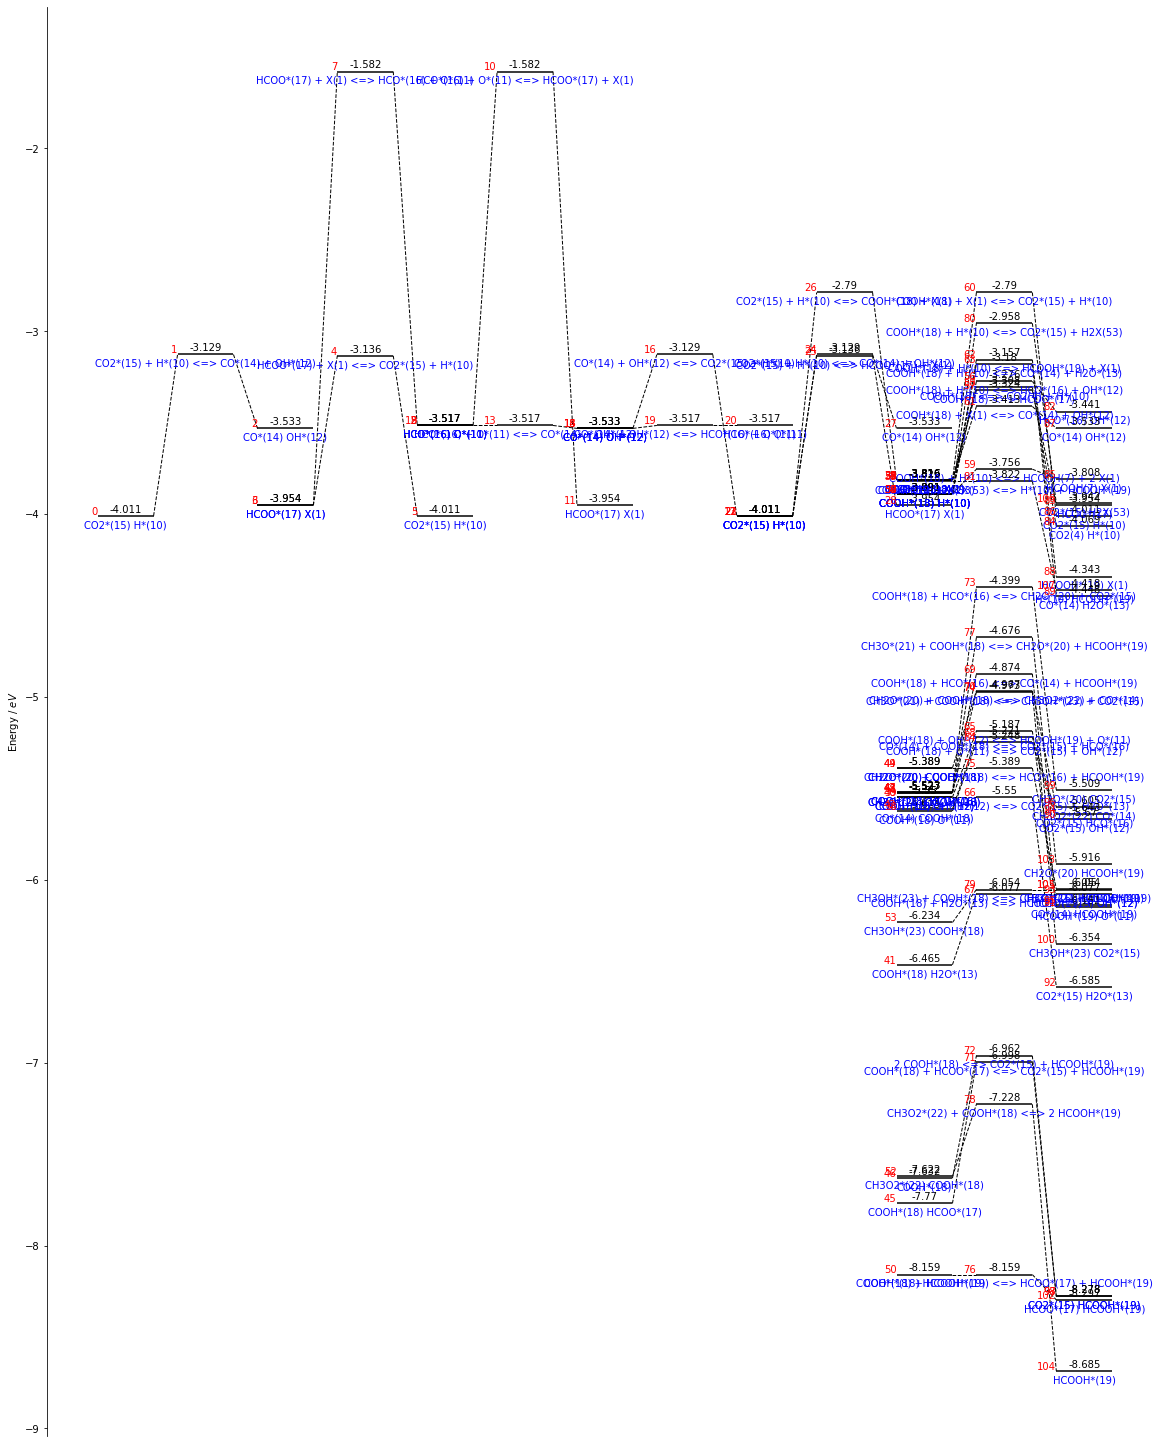

In [ ]:
pes_plot_1.add_next_reaction(
    ["COOH*(18)"],
    width=20, 
    height=40, 
    offset = 0.01,
#     dimension = 10,
#     space = 10, 
)

## PES_plot_2

In [19]:
pes_plot_2 = pes_plot.pes_plot(cti_file_path)

In [20]:
pes_plot_2.gas.species_names

['N2',
 'Ne',
 'H2(2)',
 'CO(3)',
 'CO2(4)',
 'H2O(5)',
 'CH2O(6)',
 'HCOOH(7)',
 'CH3OH(8)',
 'HCOOCH3(9)',
 'CH4(24)']

In [ ]:
pes_plot_2.surf.species_names

['X(1)',
 'H*(10)',
 'O*(11)',
 'OH*(12)',
 'H2O*(13)',
 'CO*(14)',
 'CO2*(15)',
 'HCO*(16)',
 'HCOO*(17)',
 'COOH*(18)',
 'HCOOH*(19)',
 'CH2O*(20)',
 'CH3O*(21)',
 'CH3O2*(22)',
 'CH3OH*(23)',
 'H2X(53)']

['CO2*(15)', 'H*(10)']
flipped equation:  CO*(14) + OH*(12) <=> CO2*(15) + H*(10) CO2*(15) + H*(10) <=> CO*(14) + OH*(12)


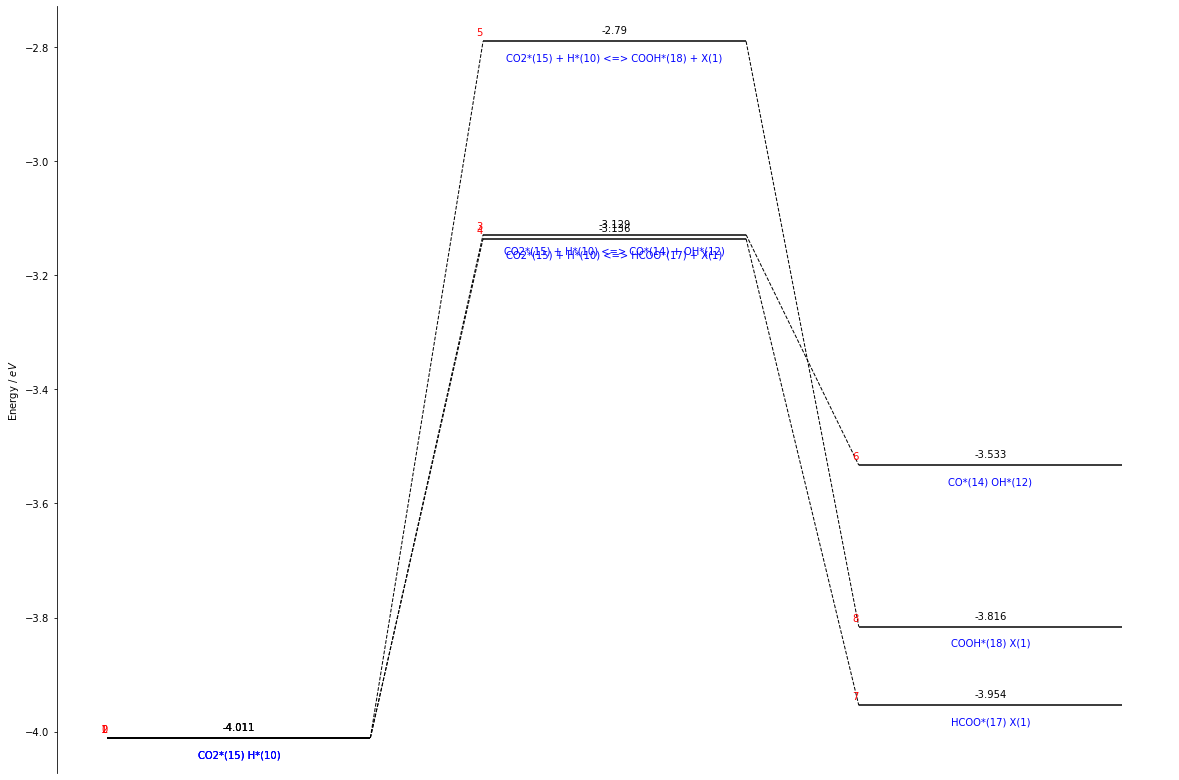

In [ ]:
pes_plot_2.plot_pes_diagram(
    ["CO2*(15)","H*(10)"],
    width=20, 
    height=40, 
    offset = 0.01,
#     dimension = 10,
#     space = 10, 
    combined=True
)

## PES_plot_3

['H2X(53)']
flipped equation:  H2(2) + X(1) <=> H2X(53) H2X(53) <=> H2(2) + X(1)
flipped equation:  CH2O*(20) + H*(10) <=> H2X(53) + HCO*(16) H2X(53) + HCO*(16) <=> CH2O*(20) + H*(10)


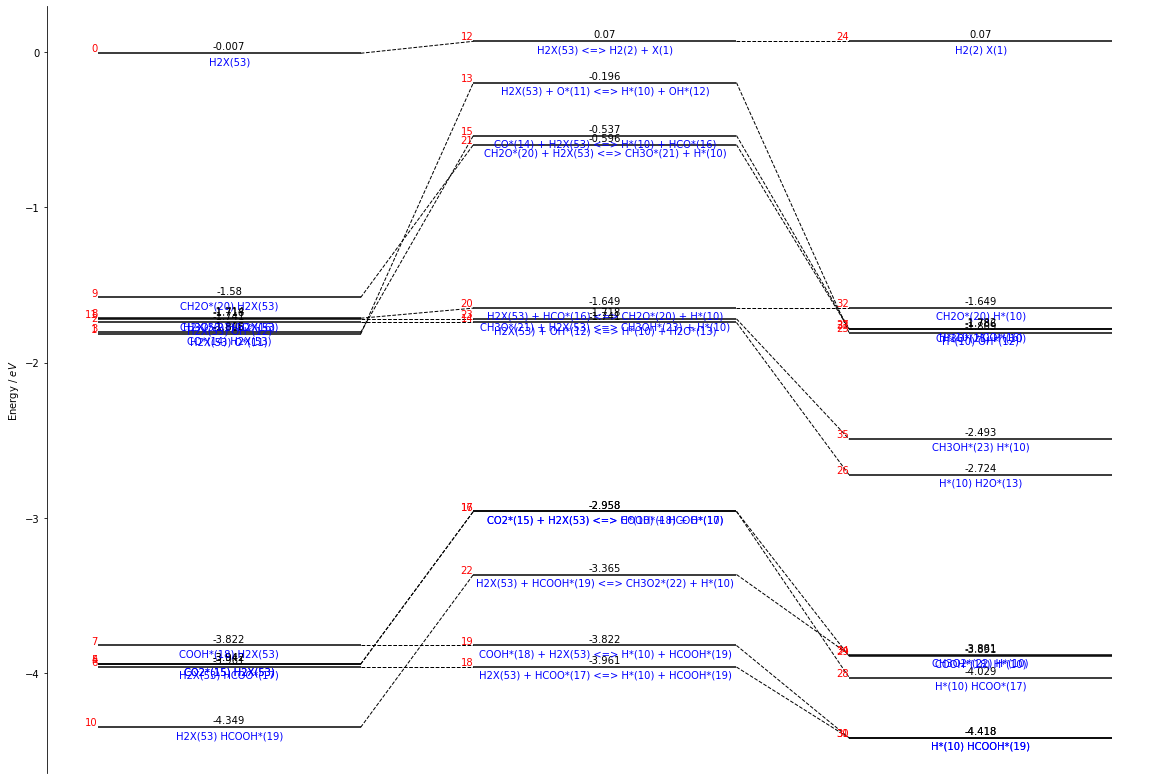

In [23]:
pes_plot_3 = pes_plot.pes_plot(cti_file_path)

pes_plot_3.plot_pes_diagram(
    ["H2X(53)"],
    width=20, 
    height=40, 
    offset = 0.01,
#     dimension = 10,
#     space = 10, 
    combined=True
)

['COOH*(18)', 'HCOOH*(19)']


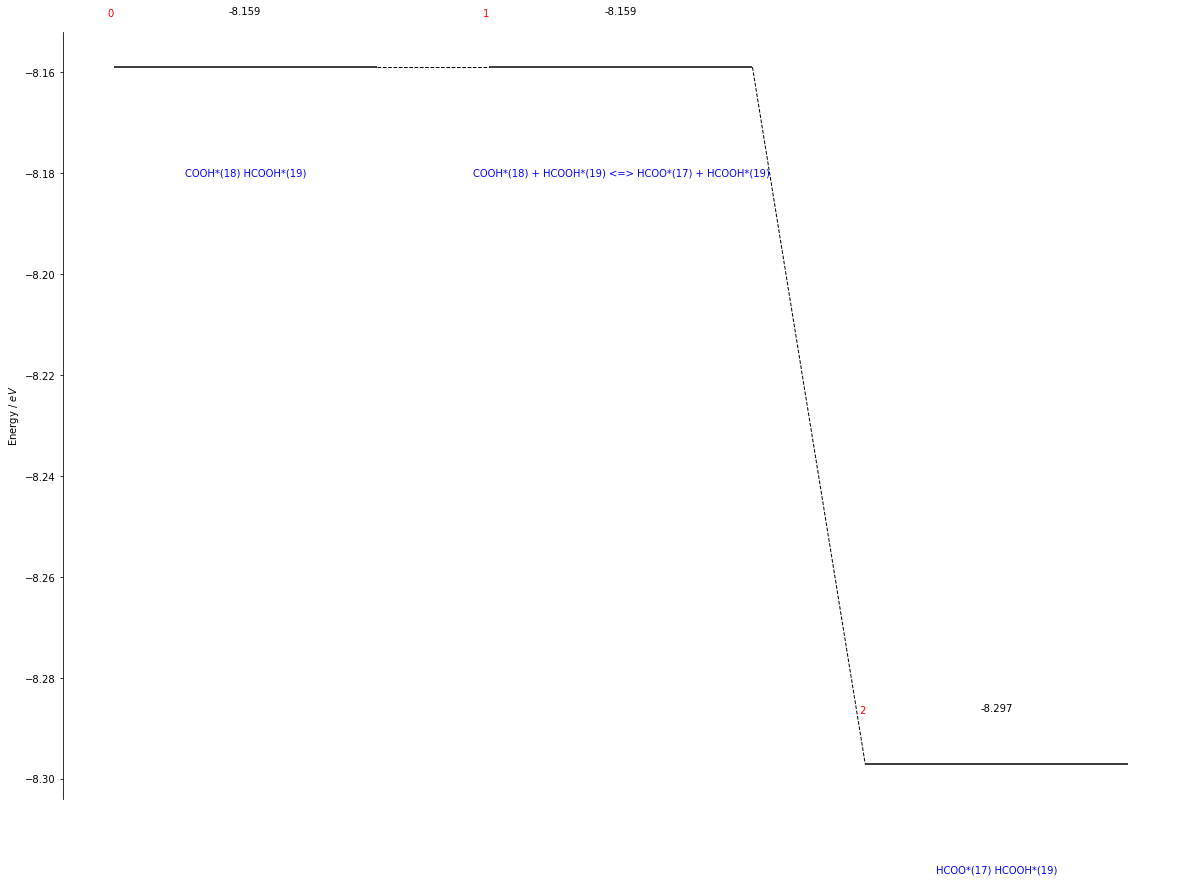

In [24]:
pes_plot_3 = pes_plot.pes_plot(cti_file_path)

pes_plot_3.plot_pes_diagram(
    ["COOH*(18)", "HCOOH*(19)"],
    width=20, 
    height=40, 
    offset = 0.01,
#     dimension = 10,
#     space = 10, 
    combined=True
)

## Compare to Bjarne's mechanism

In [25]:
bjarne_file_path = '../../External_data/Bjarne_CO2_mechanism/CO2_hydrogenation_Bjarne.cti'
pes_plot_2 = pes_plot.pes_plot(bjarne_file_path)

In [26]:
pes_plot_2.diagram.links

[]

['site(7)', 'H2(4)']


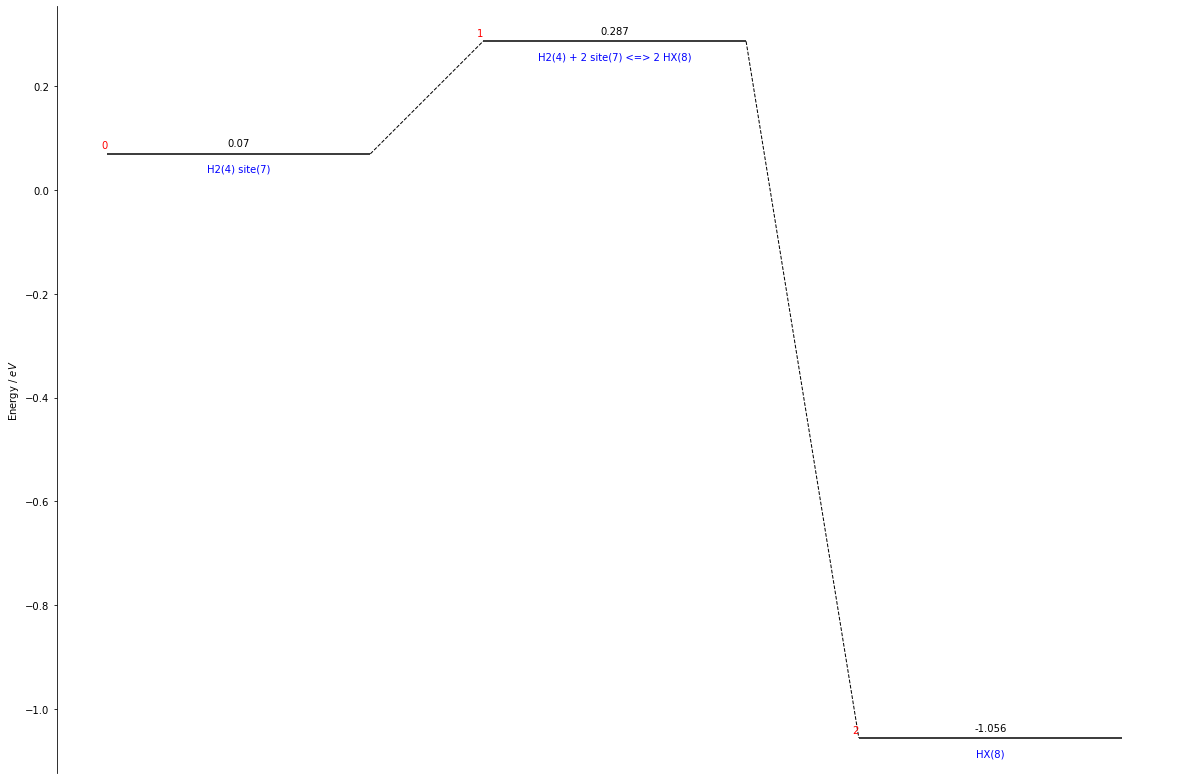

In [27]:
pes_plot_2.plot_pes_diagram(
    ["site(7)","H2(4)"],
    width=20, 
    height=40, 
    offset = 0.01,
#     dimension = 10,
#     space = 10, 
    combined=True
)

In [28]:
str_orig = 'HCOO*(17) + X(1) <=> HCO*(16) + O*(11)'
split_list = str_orig.split("<=>")
str1 = split_list[1] + " <=> " + split_list[0]
str1.strip() 

'HCO*(16) + O*(11) <=> HCOO*(17) + X(1)'

In [48]:
# get current RMG model:
rmg_model_folder = "../../External_data/"
cti_file_path = rmg_model_folder + "mech_grabow_new.cti" # get current RMG model:

In [49]:
pes_plot_4 = pes_plot.pes_plot(cti_file_path)

In [50]:
pes_plot_4.gas.species_names

['CH2O', 'CH3OH', 'CO', 'CO2', 'H2', 'H2O', 'HCOOCH3', 'HCOOH']

['X', 'CO2']


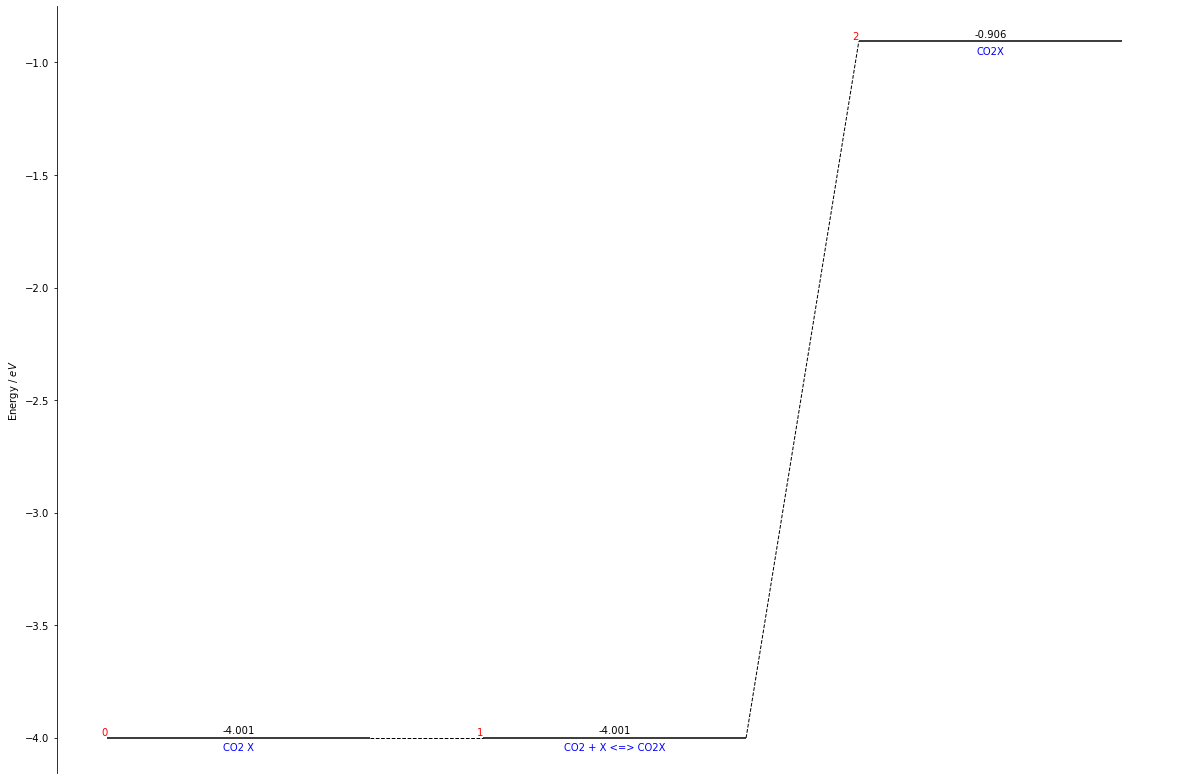

In [51]:
pes_plot_4.plot_pes_diagram(
    ["X","CO2"],
    width=20, 
    height=40, 
    offset = 0.01,
#     dimension = 10,
#     space = 10, 
    combined=True
)

['CO2X']
flipped equation:  CO2 + X <=> CO2X CO2X <=> CO2 + X
flipped equation:  COX + OX <=> CO2X + X CO2X + X <=> COX + OX
flipped equation:  COOHX + X <=> CO2X + HX CO2X + HX <=> COOHX + X
flipped equation:  COOHX + OHX <=> CO2X + H2OX CO2X + H2OX <=> COOHX + OHX


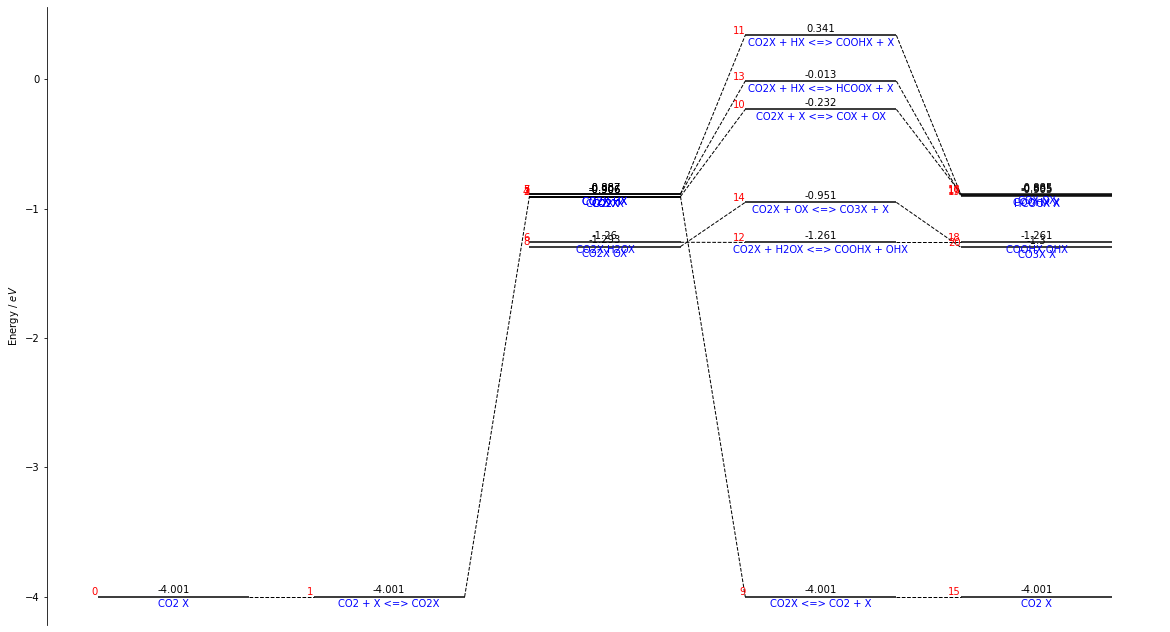

In [52]:
pes_plot_4.add_next_reaction(
    ["CO2X"],
    width=20, 
    height=40, 
    offset = 0.01,
#     dimension = 10,
#     space = 10, 
)

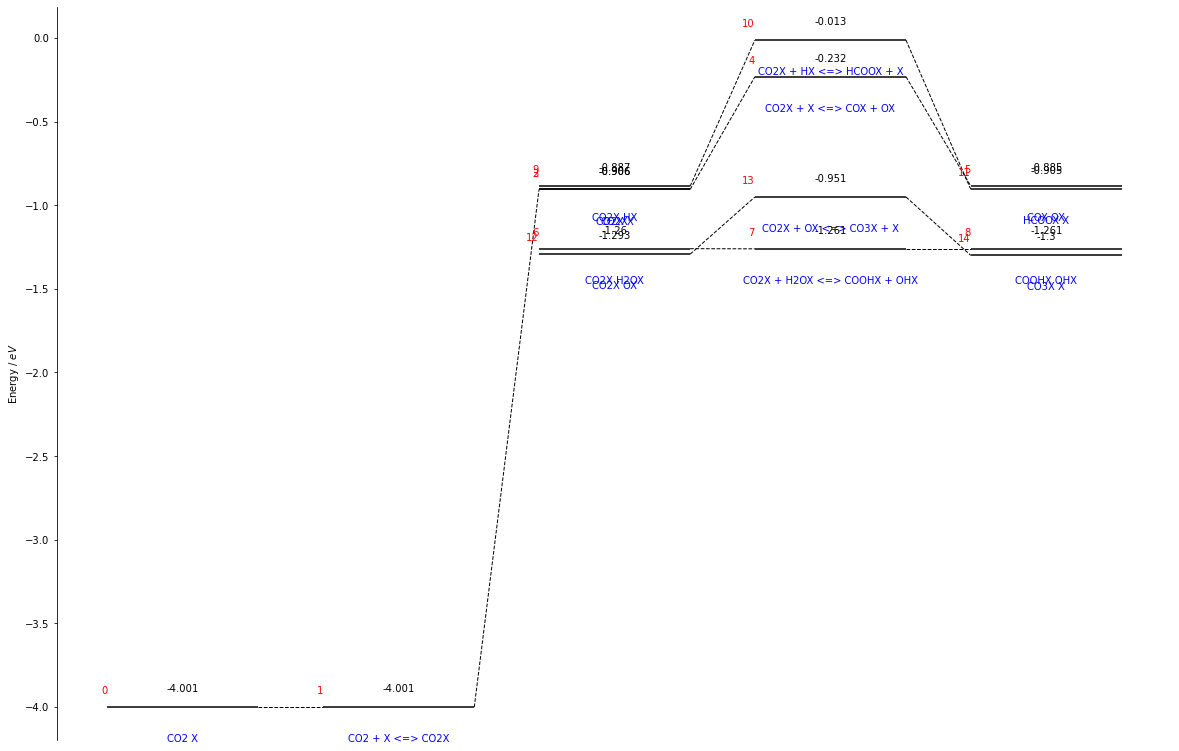

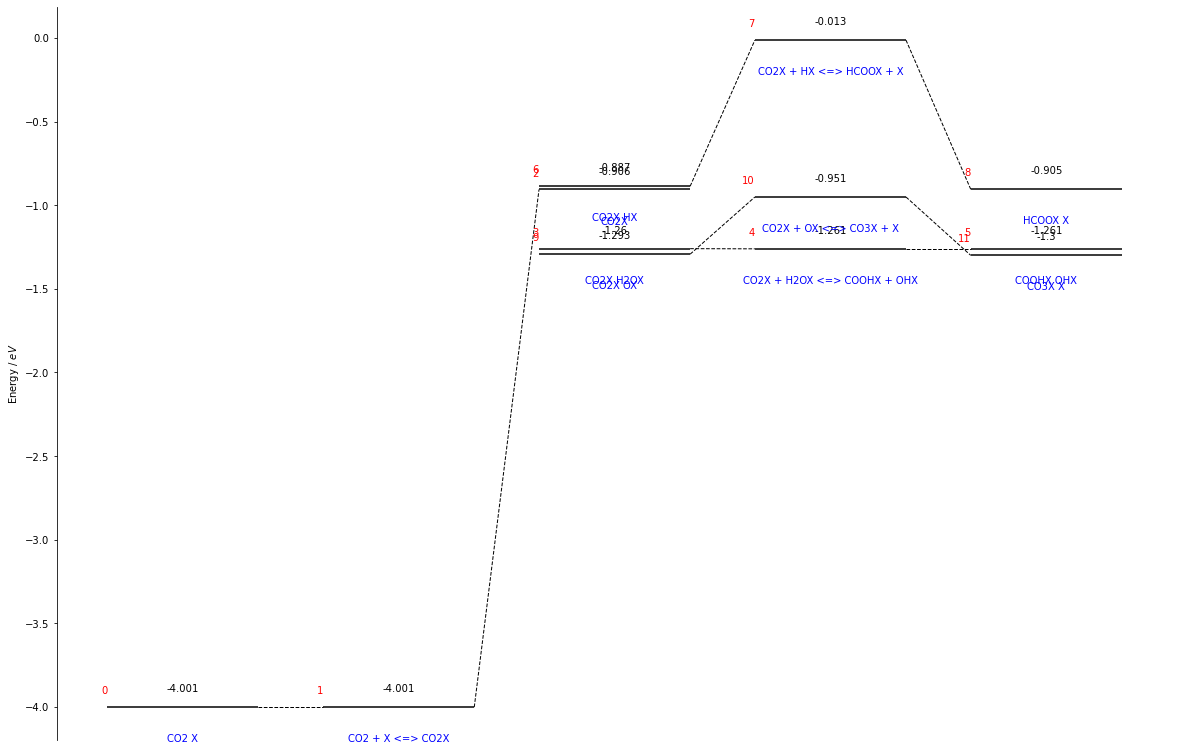

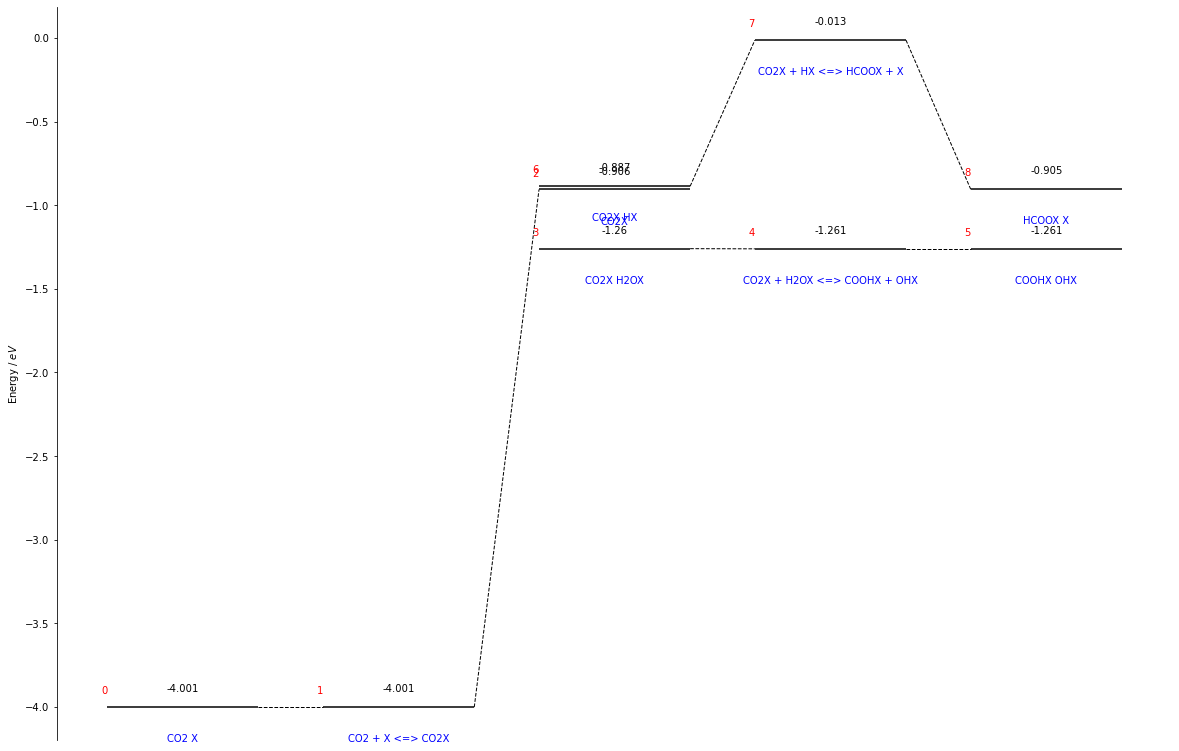

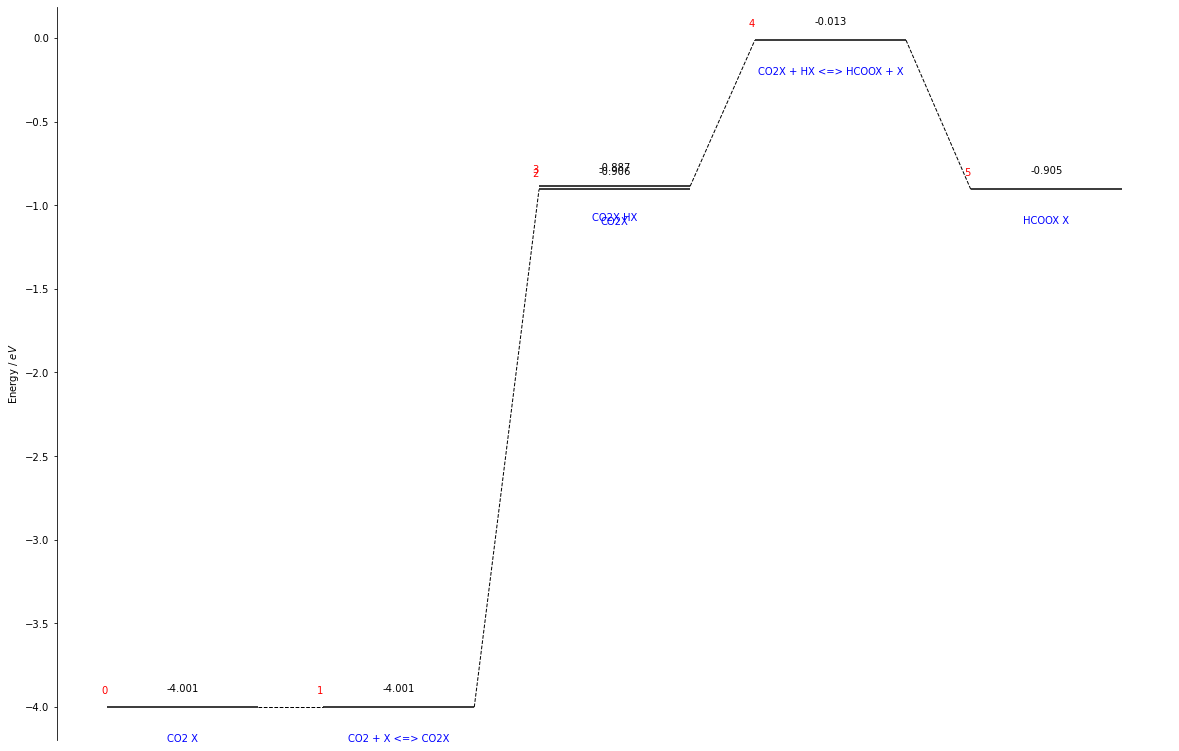

In [54]:
pes_plot_4.trim("CO2X + HX <=> COOHX + X")
pes_plot_4.trim("CO2X + X <=> COX + OX")
pes_plot_4.trim("CO2X + OX <=> CO3X + X")
pes_plot_4.trim("CO2X + H2OX <=> COOHX + OHX")

['HCOOX']
flipped equation:  CO2X + HX <=> HCOOX + X HCOOX + X <=> CO2X + HX


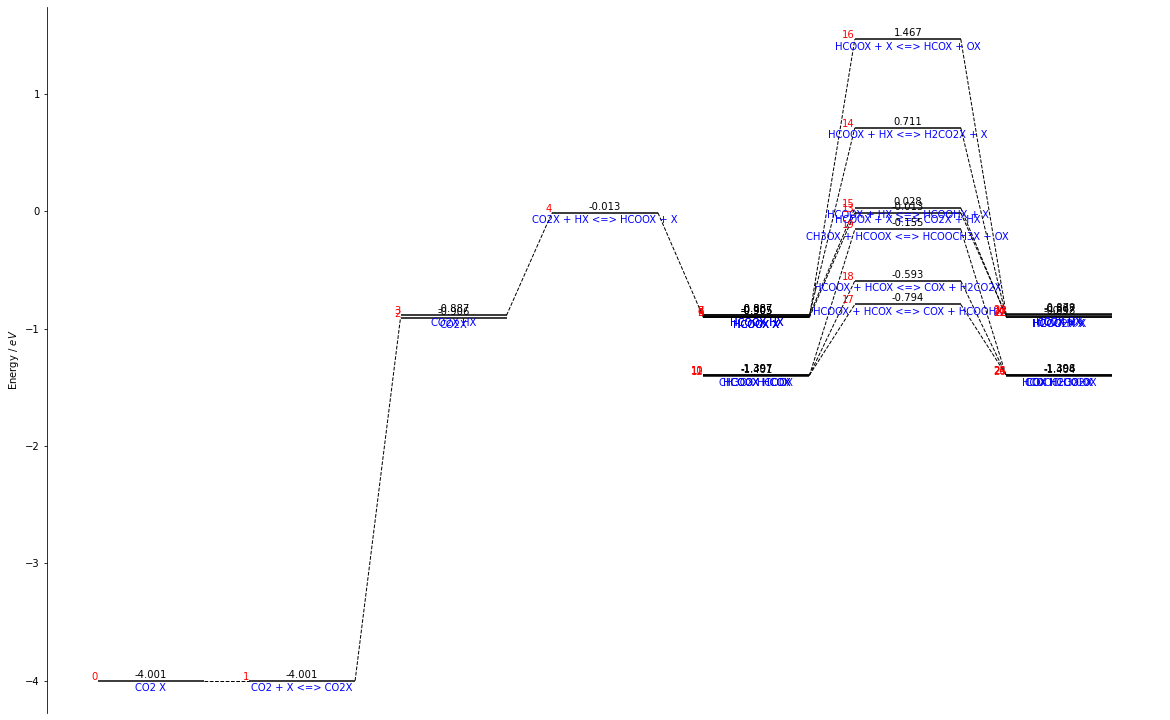

In [56]:
pes_plot_4.add_next_reaction(
    ["HCOOX"],
    width=20, 
    height=40, 
    offset = 0.01,
#     dimension = 10,
#     space = 10, 
)

In [81]:
3*(pes_plot_4.gas.species('H2').thermo.h(499)/1000**2)/96

0.18255884638048356

In [82]:
6*(pes_plot_4.surf.species('HX').thermo.h(528)/1000**2)/96

0.11145556471566113